# Oscilaciones de dos masas acopladas por resortes
## Josué Juárez Morales
------

Sean $m_1, m_2$ las masas de dos partículas conectadas por tres resortes con constantes elásticas $k_{1}, k_{2}$ y $k_3$.  El hamiltoniano del sistema esta dado por

\begin{equation}
H = \frac{p_{1}^{2}}{2m_1}  + \frac{p_{2}^{2}}{2m_2} + \frac{1}{2} k_1 x_{1}^{2} + \frac{1}{2} k_{2} (x_{2} - x_{1})^{2} + \frac{1}{2} k_3 x_{2}^{2},
\end{equation}

de las ecuaciones de Hamilton

\begin{equation}
\dot{x_i} = \frac{\partial H}{\partial p_i}
\end{equation}

\begin{equation}
\dot{p_i} = - \frac{\partial H}{\partial q_i}
\end{equation}

obtenemos las 4 ecuaciones de moviento de este sistema

\begin{equation}
\dot{x_1} = \frac{p_1}{m_1}
\end{equation}
\begin{equation}
\dot{x_2} = \frac{p_2}{m_2}
\end{equation}

\begin{equation}
\dot{p_1} = - k_{1} x_{1} + k_{2} (x_{2} - x_{1})
\end{equation}
\begin{equation}
\dot{p_2} = - k_{3} x_{2} - k_{2} (x_{2} - x_{1})
\end{equation}

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
def Q_Dot(Q,t):
  #regresa la derivada del vector Q
  x1, x2, p1, p2 = Q[0], Q[1], Q[2], Q[3]
  x1_dot = p1/m1
  x2_dot = p2/m2
  p1_dot = -k1*x1 + k2*(x2-x1)
  p2_dot = -k3*x2 - k2*(x2-x1)

  return x1_dot, x2_dot, p1_dot, p2_dot

Probamos para los siguientes parámetros. Además de la teoria sabemos que en este sistema hay dos modos normales de movimiento: el modo antisimétrico y el simétrico.

El movimiento de las masas será en modo antisimétrico si se dan las condiciones iniciales $x_{1}(0) = - x_{2}(0)$ y $p_{1}(0) = - p_{2}(0)$-

In [3]:
k1= 1.0
k2= 0.5
k3 = 1.5
m1 = 1.0
m2 = 1.5
t = np.linspace(0, 15, num=100)
Q0 = [-0.5, 0.5, 2, -2] #condiciones iniciales (antimsimetrico)

In [4]:
Q = integrate.odeint(Q_Dot, Q0, t)
x1 = Q[:,0]
x2 = Q[:,1]

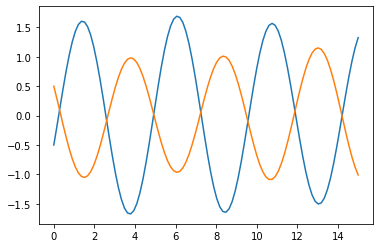

In [5]:
plt.plot(t, x1)
plt.plot(t, x2)

Para el caso del movimiento en modo simétrico, las condiciones iniciales deben ser $x_{1}(0) = x_{2}(0)$ y $p_{1}(0) = p_{2}(0)$.

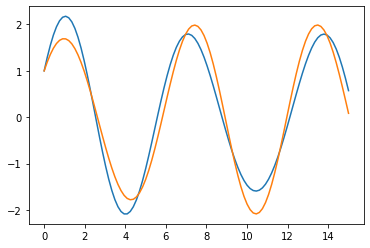

In [6]:
Q0 = [1, 1, 2, 2]

Q = integrate.odeint(Q_Dot, Q0, t)
x1 = Q[:,0]
x2 = Q[:,1]

plt.plot(t, x1)
plt.plot(t, x2)

Uno de los teoremas de conservación nos dice que si el Lagrangiano del sistema no depende explicitamente del tiempo entonces el Hamiltoniano se conserva

\begin{equation}
H = E = cte.
\end{equation}

Podemos calcular los valores de $E$ en los diferentes tiempos con los valores ya calculados.

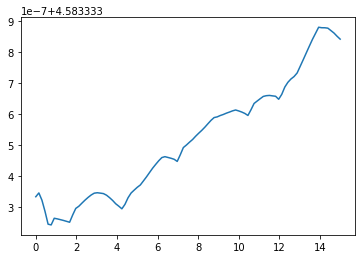

In [7]:
E = np.zeros((Q.shape[0], 1))
E[:,0] = (1/(2*m1))*Q[:,2]**2 + (1/(2*m2))*Q[:,3]**2 + (k1/2)*Q[:,0]**2 + (k2/2)*(Q[:,1] - Q[:,0])**2 + (k3/2)*Q[:,1]**2
plt.plot(t,E)

Observamos que la energía del sistema aumentó con el tiempo, este aumento se debe al error númerico. Observando la escala de la gráfica observamos que en todo el intervalo de integración hubo un aumento de $0.0000006$ en la energía, lo cual pude ser despreciable.

(¿El error númerico disminuye aumentando el intervalo de tiempo?)

# Sistema de $n$ partículas acopladas con resortes
-------------
El hamiltoniano de un sistema de n partículas de masa $m_i = m$ acoplados por resortes de constante elastica $k_i = k$ esta dado por

\begin{equation}
H = \sum_{i = 1}^{n} \frac{p_{i}^{2}}{2m_{i}} + \sum_{i = 0}^{n} \frac{k}{2} (x_{i+1} - x_{i})^{2},
\end{equation}

y las ecuaciones de movimiento son

\begin{equation}
\dot{x_{i}} = \frac{\partial H}{\partial p_i} = \frac{p_i}{m},
\end{equation}

\begin{equation}
\dot{p_{i}} = - \frac{\partial H}{\partial x_i} = k(x_{i+1} - 2x_{i} + x_{i-1}).
\end{equation}

Por simplicidad escogemos $k_{i} = k, m_{i} = m, i = 0,1, \cdots, n$

In [8]:
k = 1
m = 1

In [9]:
def Qn_Dot(Q, t, n):
    #regresa la derivada del vector Q
    xi = np.zeros((n))
    pi = np.zeros((n))
    qi_dot = np.zeros((n))
    pi_dot = np.zeros((n))
    
    for i in range(0,n):
        xi[i] = Q[i]
    xi = np.append(xi, [0])  #para el cuando i = 0 en xi[i-1]
    for i in range(n,2*n):
        pi[i-n] = Q[i]
    
    for i in range(0,n):
        qi_dot[i] = pi[i]/m #xi_dot
        pi_dot[i] = k*(xi[i+1] - 2*xi[i] + xi[i-1]) #pi_dot
        
    Q_dot = np.concatenate((qi_dot, pi_dot), axis=None)

    return Q_dot

Como ejemplo $n = 8$ masas acopladas

In [10]:
n = 8
t = np.linspace(0, 15, num=100)
Q0 = [np.random.randint(0, 5) for i in range(0,2*n)] #Condiciones iniciales aleatorias

In [11]:
Q = integrate.odeint(Qn_Dot, Q0, t, args = (n,))

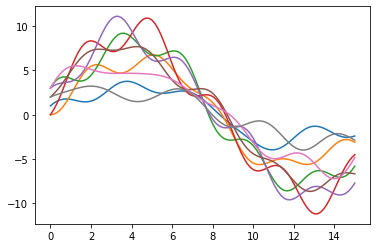

In [12]:
for i in range(0,n):
    plt.plot(t,Q[:,i])

Pendiente calcular $E$